# Analyse du 1er fichier Emotion_final

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation

import pandas as pd

df1 = pd.read_csv('Emotion_final.csv')
df1.head(5)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [14]:
df1.Emotion.value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [16]:
df1.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i was intensely conscious of how much cash i h...,happy
freq,2,7029


In [17]:
df1.Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [18]:
g1 = df1.groupby('Emotion').describe()
g1

Text                                                               
         count unique                                                top freq
Emotion                                                                      
anger     2993   2992         There was a hint of exasperation in his vo    2
fear      2652   2651  His comments are a major diplomatic gaffe as t...    2
happy     7029   7028  i feel more adventurous willing to take risks ...    2
love      1641   1641  i feel like i was a naughty girl and should ha...    1
sadness   6265   6265  Through some unexplained process , magnetic fi...    1
surprise   879    879  A bewildered Dick Francis walks back to the we...    1

# Fréquence des emotions

In [20]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py



trace = go.Bar(
                x = g1.index,
                y = g1[('Text','count')],
                name = "La fréquence des emotions",
                marker = dict(color = 'rgba(255, 87, 51, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =2.5)),
                text = g1[('Text','count')])

layout = go.Layout(barmode = "group",
                  title = 'Fréquence des emotions ',
                  yaxis = dict(title = 'emotion frequncy'),
                  xaxis = dict(title = 'emotion rank'))
fig = go.Figure(data = trace, layout = layout)

iplot(fig)

In [21]:
df1.Emotion = df1.Emotion.replace(['happy','sadness','anger','fear','love','surprise'],[1,2,3,4,5,6])
df1.head(5)

,Text,Emotion
0,i didnt feel humiliated,2
1,i can go from feeling so hopeless to so damned...,2
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,5
4,i am feeling grouchy,3


In [22]:
df1.Emotion = df1.Emotion.astype('str')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [23]:
# from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt


x = df1.Text#.values
#x = x.values.reshape(40000,1)#.to_numpy()
print(x.shape)

y = df1.Emotion
print(y.shape)

stopword = stopwords.words('english')

vec = CountVectorizer(stop_words=stopword)#, ngram_range=(2,2))
X = vec.fit_transform(x)
words = vec.get_feature_names()

print(X.shape)
print("type data :", type(X))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
(21459,)
(21459,)
(21459, 19070)
type data : <class 'scipy.sparse.csr.csr_matrix'>


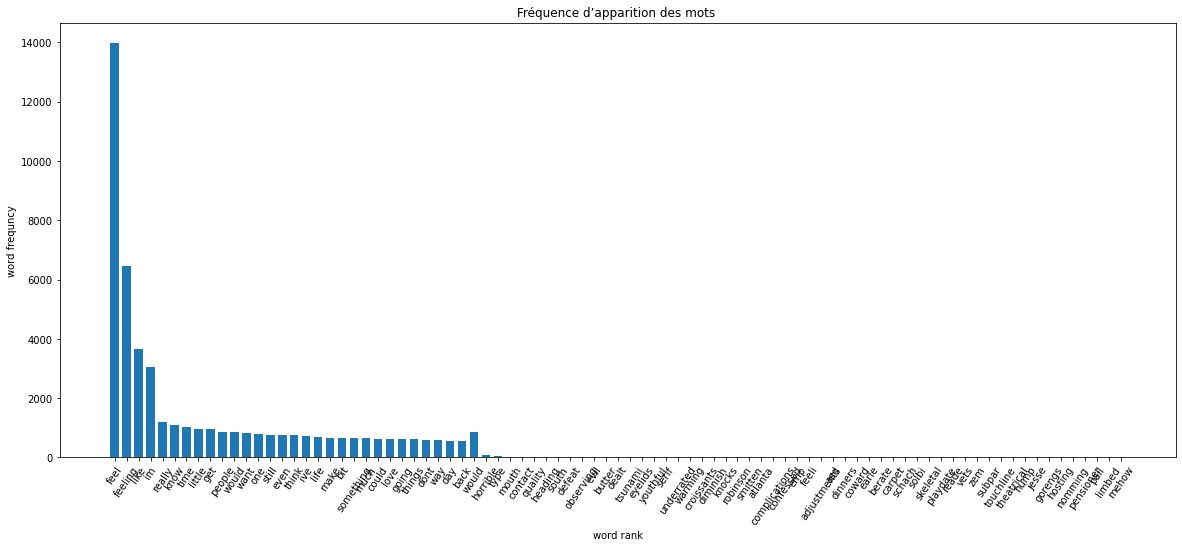

In [24]:
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

def subsample(x, step=350):
    return np.hstack((x[:30], x[10::step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Fréquence d’apparition des mots ");
        

In [25]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py

freq = subsample(wrank)
r = np.arange(len(freq))

trace = go.Bar(
                x = r,
                y = freq,
                name = "Le score universitaire pour le transfert de connaissances par pays",
                marker = dict(color = 'rgba(255, 87, 51, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =2.5)),
                text = subsample(labels))

layout = go.Layout(barmode = "group",
                  title = 'Fréquence d’apparition des mots ',
                  yaxis = dict(title = 'word frequncy'),
                  xaxis = dict(title = 'word rank'))
fig = go.Figure(data = trace, layout = layout)
fig.update_xaxes(
        tickmode='array',
        tickvals = r,
        ticktext = labels
)
iplot(fig)

# CountVectorizer with function 

In [26]:
import string
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer,LancasterStemmer


m = "The girls wanted to played with their parents ...."
#m = 'Sample message! Notice: it has punctuation.'

def clean_text(m):
    punct=[]
    clean=[]
    lem = []
    stemming = []
    # tokenisation + punctuation
    for item in m :
        if item not in string.punctuation:
            punct.append(item)#.WordNetLemmatizer())
            #print(punct1)
            p=''.join(punct)
    # Stopwords
    for item in p.split():#punctuation(m).split():
        if item.lower() not in stopwords.words('english'):
            clean.append(item)#.WordNetLemmatizer())
    # Lemmatization
    for each in clean :
        lemma = WordNetLemmatizer()
        lem=[lemma.lemmatize(word)for word in clean]
    # Stemming
    for item in lem:
        b = PorterStemmer().stem(item)
        # = LancasterStemmer().stem(b)
        stemming.append(b)
    return ",".join(stemming)
print(clean_text(m))

girl,want,play,parent


In [27]:
# function lemmatization + stemming
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer,LancasterStemmer

z = "The girls wanted to played"


def lem_stem(z):
    lem =[]
    stemming = []
    for each in z.split() :
        lemma = WordNetLemmatizer()
        lem=[lemma.lemmatize(word)for word in z.split()]
    # Stemming
    for item in lem:
        b = PorterStemmer().stem(item)
        # = LancasterStemmer().stem(b)
        stemming.append(b)
    return stemming
print(lem_stem(z))

['the', 'girl', 'want', 'to', 'play']


In [28]:
x1 = df1.Text#.values
#x = x.values.reshape(40000,1)#.to_numpy()
print(x1.shape)

y1 = df1.Emotion
print(y1.shape)

stopword = stopwords.words('english')

vec1 = CountVectorizer(analyzer=clean_text)#, ngram_range=(2,2))
X1 = vec1.fit_transform(x1)
words1 = vec1.get_feature_names()

print(X.shape)

(21459,)
(21459,)
(21459, 19070)


In [31]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py

wsum = np.array(X1.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

def subsample_1(x1, step=350):
    return np.hstack((x1[:30], x1[10::step]))

freq = subsample_1(wrank)
r = np.arange(len(freq))

trace = go.Bar(
                x = r,
                y = freq,
                name = "Le score universitaire pour le transfert de connaissances par pays",
                marker = dict(color = 'rgba(255, 87, 51, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =2.5)),
                text = subsample(labels))

layout = go.Layout(barmode = "group",
                  title = 'Fréquence d’apparition des mots ',
                  yaxis = dict(title = 'word frequncy'),
                  xaxis = dict(title = 'word rank'))
fig = go.Figure(data = trace, layout = layout)
fig.update_xaxes(
        tickmode='array',
        tickvals = r,
        ticktext = labels
)
iplot(fig)

# Tfidvectorizer without lemmatization, stemming

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x_1 = df1.Text
print(x_1.shape)

y_1 = df1.Emotion
print(y_1.shape)

vect_1 = TfidfVectorizer(stop_words=stopword)
X_1 = vect_1.fit_transform(x_1)
print(X_1.shape)


(21459,)
(21459,)
(21459, 19070)


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=0)

model_LR = LogisticRegression()
model_LR.fit(X_1,y_1)
model_LR


y_pred=model_LR.predict(x_test)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print(model_LR.predict(X_1[0]))
print(model_LR.predict(X_1[3]))
print(model_LR.predict(X_1[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_LR = model_LR.score(x_test, y_test)                              
print("Score = ",score_LR.round(3))

recall_LR = recall_score(y_test, y_pred, average='macro')                             
print("Recall = ", recall_LR.round(3))

precision_LR = precision_score(y_test, y_pred, average='macro')
print("Precision = ",precision_LR.round(3))

f1_score_LR = f1_score(y_test, y_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score_happy_LR = ",f1_score_LR.round(3))
#print("f1_score_sadness_LR = ",f1_score_happy_LR)


Score =  0.948
Recall =  0.909
Precision =  0.949
f1_score_happy_LR =  [0.957 0.965 0.959 0.936 0.889 0.857]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to '2') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.



In [ ]:
dff1 = pd.DataFrame({'precision': precision_LR, 'score': score_LR, 'recall': recall_LR, 'f1_score_happy':f1_score_LR[0],
                                                                'f1_score_sadness':f1_score_LR[1],'f1_score_anger':f1_score_LR[2]
                                                                ,'f1_score_fear':f1_score_LR[3],'f1_score_love':f1_score_LR[4],
                                                               'f1_score_surprise':f1_score_LR[5]},
                      index = ['Logistic_Regression'])
dff1

,precision,score,recall,f1_score_happy,f1_score_sadness,f1_score_anger,f1_score_fear,f1_score_love,f1_score_surprise
Logistic_Regression,0.949419,0.948276,0.908746,0.957343,0.964567,0.959064,0.935515,0.888889,0.857143


# SVM kernel = linear

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=0)

model_SVM_linear = svm.SVC(kernel='linear')
model_SVM_linear.fit(X_1, y_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y2_pred=model_SVM_linear.predict(x2_test)

In [ ]:
print(model_SVM_linear.predict(X_1[0]))
print(model_SVM_linear.predict(X_1[3]))
print(model_SVM_linear.predict(X_1[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_SVM_linear = model_SVM_linear.score(x2_test, y2_test)                              
print("Score = ",score_SVM_linear.round(3))

recall_SVM_linear = recall_score(y2_test, y2_pred, average='macro')                             
print("Recall = ", recall_SVM_linear.round(3))

precision_SVM_linear = precision_score(y2_test, y2_pred, average='macro')
print("Precision = ",precision_SVM_linear.round(3))

f1_score_SVM_linear = f1_score(y2_test, y2_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_SVM_linear.round(3))

Score =  0.959
Recall =  0.94
Precision =  0.951
f1_score =  [0.968 0.972 0.962 0.951 0.913 0.904]


In [ ]:
dff2 = pd.DataFrame({'precision': precision_SVM_linear, 'score': score_SVM_linear, 'recall': recall_SVM_linear, 'f1_score_happy':f1_score_SVM_linear[0],
                                                                'f1_score_sadness':f1_score_SVM_linear[1],'f1_score_anger':f1_score_SVM_linear[2]
                                                                ,'f1_score_fear':f1_score_SVM_linear[3],'f1_score_love':f1_score_SVM_linear[4],
                                                               'f1_score_surprise':f1_score_SVM_linear[5]},
                      index = ['SVM_kernel=linear'])
dff2

,precision,score,recall,f1_score_happy,f1_score_sadness,f1_score_anger,f1_score_fear,f1_score_love,f1_score_surprise
SVM_kernel=linear,0.950678,0.959459,0.940039,0.968384,0.971657,0.961667,0.950606,0.913386,0.904494


# SVM kernel=poly

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=0)

model_SVM_poly = svm.SVC(kernel='poly')
model_SVM_poly.fit(X_1, y_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y3_pred=model_SVM_poly.predict(x3_test)

In [ ]:
print(model_SVM_poly.predict(X_1[0]))
print(model_SVM_poly.predict(X_1[3]))
print(model_SVM_poly.predict(X_1[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_SVM_poly = model_SVM_poly.score(x3_test, y3_test)                              
print("Score = ",score_SVM_poly.round(3))

recall_SVM_poly = recall_score(y3_test, y3_pred, average='macro')                             
print("Recall = ", recall_SVM_poly.round(3))

precision_SVM_poly = precision_score(y3_test, y3_pred, average='macro')
print("Precision = ",precision_SVM_linear.round(3))

f1_score_SVM_poly = f1_score(y3_test, y3_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_SVM_poly.round(3))

Score =  0.997
Recall =  0.994
Precision =  0.951
f1_score =  [0.998 0.998 0.997 0.997 0.989 0.997]


In [ ]:
dff3 = pd.DataFrame({'precision': precision_SVM_poly, 'score': score_SVM_poly, 'recall': recall_SVM_poly, 'f1_score_happy':f1_score_SVM_poly[0],
                                                                'f1_score_sadness':f1_score_SVM_poly[1],'f1_score_anger':f1_score_SVM_poly[2]
                                                                ,'f1_score_fear':f1_score_SVM_poly[3],'f1_score_love':f1_score_SVM_poly[4],
                                                               'f1_score_surprise':f1_score_SVM_poly[5]},
                      index = ['SVM_kernel=poly'])
dff3

,precision,score,recall,f1_score_happy,f1_score_sadness,f1_score_anger,f1_score_fear,f1_score_love,f1_score_surprise
SVM_kernel=poly,0.998046,0.996971,0.994183,0.997504,0.998015,0.997498,0.997146,0.989114,0.997275


# Decision tree

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

x4_train, x4_test, y4_train, y4_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=0)

model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_1, y_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y4_pred=model_tree.predict(x4_test)

In [ ]:
print(model_tree.predict(X_1[0]))
print(model_tree.predict(X_1[3]))
print(model_tree.predict(X_1[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_tree = model_tree.score(x4_test, y4_test)                              
print("Score = ",score_tree.round(3))

recall_tree = recall_score(y4_test, y4_pred, average='macro')                             
print("Recall = ", recall_tree.round(3))

precision_tree = precision_score(y4_test, y4_pred, average='macro')
print("Precision = ",precision_tree.round(3))

f1_score_tree = f1_score(y4_test, y4_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_tree.round(3))

Score =  0.997
Recall =  0.995
Precision =  0.998
f1_score =  [0.998 0.999 0.999 0.997 0.989 0.997]


In [ ]:
dff4 = pd.DataFrame({'precision': precision_tree, 'score': score_tree, 'recall': recall_tree, 'f1_score_happy':f1_score_tree[0],
                                                                'f1_score_sadness':f1_score_tree[1],'f1_score_anger':f1_score_tree[2]
                                                                ,'f1_score_fear':f1_score_tree[3],'f1_score_love':f1_score_tree[4],
                                                               'f1_score_surprise':f1_score_tree[5]},
                      index = ['Decision_tree'])
dff4

,precision,score,recall,f1_score_happy,f1_score_sadness,f1_score_anger,f1_score_fear,f1_score_love,f1_score_surprise
Decision_tree,0.998456,0.997437,0.994593,0.997504,0.998809,0.999166,0.997146,0.989114,0.997275


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x5_train, x5_test, y5_train, y5_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=0)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_1, y_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y5_pred=model_KNN.predict(x5_test)

In [ ]:
print(model_KNN.predict(X_1[0]))
print(model_KNN.predict(X_1[3]))
print(model_KNN.predict(X_1[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_KNN = model_KNN.score(x5_test, y5_test)                              
print("Score = ",score_KNN.round(3))

recall_KNN = recall_score(y5_test, y5_pred, average='macro')                             
print("Recall = ", recall_KNN.round(3))

precision_KNN = precision_score(y5_test, y5_pred, average='macro')
print("Precision = ",precision_KNN.round(3))

f1_score_KNN = f1_score(y5_test, y5_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_KNN.round(3))

Score =  0.859
Recall =  0.775
Precision =  0.866
f1_score =  [0.899 0.902 0.82  0.793 0.765 0.651]


In [ ]:
dff5 = pd.DataFrame({'precision': precision_KNN, 'score': score_KNN, 'recall': recall_KNN, 'f1_score_happy':f1_score_KNN[0],
                                                                'f1_score_sadness':f1_score_KNN[1],'f1_score_anger':f1_score_KNN[2]
                                                                ,'f1_score_fear':f1_score_KNN[3],'f1_score_love':f1_score_KNN[4],
                                                               'f1_score_surprise':f1_score_KNN[5]},
                      index = ['KNN'])
dff5

,precision,score,recall,f1_score_happy,f1_score_sadness,f1_score_anger,f1_score_fear,f1_score_love,f1_score_surprise
KNN,0.866218,0.858807,0.774733,0.899,0.902362,0.820208,0.792812,0.765125,0.650519


In [ ]:
dff = pd.concat([dff1,dff2,dff3,dff4,dff5])
dff

,precision,score,recall,f1_score_happy,f1_score_sadness,f1_score_anger,f1_score_fear,f1_score_love,f1_score_surprise
Logistic_Regression,0.949419,0.948276,0.908746,0.957343,0.964567,0.959064,0.935515,0.888889,0.857143
SVM_kernel=linear,0.950678,0.959459,0.940039,0.968384,0.971657,0.961667,0.950606,0.913386,0.904494
SVM_kernel=poly,0.998046,0.996971,0.994183,0.997504,0.998015,0.997498,0.997146,0.989114,0.997275
Decision_tree,0.998456,0.997437,0.994593,0.997504,0.998809,0.999166,0.997146,0.989114,0.997275
KNN,0.866218,0.858807,0.774733,0.899000,0.902362,0.820208,0.792812,0.765125,0.650519


# TfidVectorizer with lemmatization, stemming

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x_1 = df1.Text
print(x_1.shape)

y_1 = df1.Emotion
print(y_1.shape)

vect_2 = TfidfVectorizer(analyzer= lem_stem, stop_words=stopword)
X_2 = vect_2.fit_transform(x_1)
print(X_2.shape)


(21459,)
(21459,)
(21459, 13392)


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_2, y_1, test_size = 0.2, random_state=0)

model_func_LR= LogisticRegression()
model_func_LR.fit(X_2,y_1)
model_func_LR


y_pred=model_func_LR.predict(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print(model_func_LR.predict(X_2[0]))
print(model_func_LR.predict(X_2[3]))
print(model_func_LR.predict(X_2[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_func_LR = model_func_LR.score(x_test, y_test)                              
print("Score = ",score_func_LR.round(3))

recall_func_LR = recall_score(y_test, y_pred, average='macro')                             
print("Recall = ", recall_func_LR.round(3))

precision_func_LR = precision_score(y_test, y_pred, average='macro')
print("Precision = ",precision_func_LR.round(3))

f1_score_func_LR = f1_score(y_test, y_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_func_LR.round(3))
#print("f1_score_sadness_LR = ",f1_score_happy_LR)

Score =  0.91
Recall =  0.852
Precision =  0.917
f1_score =  [0.927 0.933 0.916 0.893 0.801 0.807]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to '2') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.



In [ ]:
dff_1 = pd.DataFrame({'precision_func': precision_func_LR, 'score_func': score_func_LR, 'recall_func': recall_func_LR, 'f1_score_func_happy':f1_score_func_LR[0],
                                                                'f1_score_func_sadness':f1_score_func_LR[1],'f1_score_func_anger':f1_score_func_LR[2]
                                                                ,'f1_score_func_fear':f1_score_func_LR[3],'f1_score_func_love':f1_score_func_LR[4],
                                                               'f1_score_func_surprise':f1_score_func_LR[5]},
                      index = ['Logistic_Regression'])
dff_1

,precision_func,score_func,recall_func,f1_score_func_happy,f1_score_func_sadness,f1_score_func_anger,f1_score_func_fear,f1_score_func_love,f1_score_func_surprise
Logistic_Regression,0.917094,0.910065,0.851973,0.926729,0.932606,0.915825,0.893451,0.800699,0.807339


# SVM kernel = linear

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X_2, y_1, test_size = 0.2, random_state=0)

model_func_SVM_linear = svm.SVC(kernel='linear')
model_func_SVM_linear.fit(X_2, y_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y2_pred=model_func_SVM_linear.predict(x2_test)

In [ ]:
print(model_func_SVM_linear.predict(X_2[0]))
print(model_func_SVM_linear.predict(X_2[3]))
print(model_func_SVM_linear.predict(X_2[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_func_SVM_linear = model_func_SVM_linear.score(x2_test, y2_test)                              
print("Score = ",score_func_SVM_linear.round(3))

recall_func_SVM_linear = recall_score(y2_test, y2_pred, average='macro')                             
print("Recall = ", recall_func_SVM_linear.round(3))

precision_func_SVM_linear = precision_score(y2_test, y2_pred, average='macro')
print("Precision = ",precision_func_SVM_linear.round(3))

f1_score_func_SVM_linear = f1_score(y2_test, y2_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_func_SVM_linear.round(3))

Score =  0.931
Recall =  0.904
Precision =  0.922
f1_score =  [0.945 0.944 0.935 0.917 0.855 0.88 ]


In [ ]:
dff_2 = pd.DataFrame({'precision_func': precision_func_SVM_linear, 'score_func': score_func_SVM_linear, 'recall_func': recall_func_SVM_linear, 'f1_score_func_happy':f1_score_func_SVM_linear[0],
                                                                'f1_score_func_sadness':f1_score_func_SVM_linear[1],'f1_score_func_anger':f1_score_func_SVM_linear[2]
                                                                ,'f1_score_func_fear':f1_score_func_SVM_linear[3],'f1_score_func_love':f1_score_func_SVM_linear[4],
                                                               'f1_score_func_surprise':f1_score_func_SVM_linear[5]},
                      index = ['SVM_kernel=linear'])
dff_2

,precision_func,score_func,recall_func,f1_score_func_happy,f1_score_func_sadness,f1_score_func_anger,f1_score_func_fear,f1_score_func_love,f1_score_func_surprise
SVM_kernel=linear,0.922381,0.930801,0.904442,0.944876,0.944312,0.935216,0.917448,0.854812,0.879552


# SVM kernel = poly

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(X_2, y_1, test_size = 0.2, random_state=0)

model_func_SVM_poly = svm.SVC(kernel='poly')
model_func_SVM_poly.fit(X_2, y_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y3_pred=model_func_SVM_poly.predict(x3_test)
print(model_func_SVM_poly.predict(X_2[0]))
print(model_func_SVM_poly.predict(X_2[3]))
print(model_func_SVM_poly.predict(X_2[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_func_SVM_poly = model_func_SVM_poly.score(x3_test, y3_test)                              
print("Score = ",score_func_SVM_poly.round(3))

recall_func_SVM_poly = recall_score(y3_test, y3_pred, average='macro')                             
print("Recall = ", recall_func_SVM_poly.round(3))

precision_func_SVM_poly = precision_score(y3_test, y3_pred, average='macro')
print("Precision = ",precision_func_SVM_linear.round(3))

f1_score_func_SVM_poly = f1_score(y3_test, y3_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_func_SVM_poly.round(3))

Score =  0.997
Recall =  0.994
Precision =  0.922
f1_score =  [0.997 0.998 0.997 0.997 0.989 0.997]


In [ ]:
dff_3 = pd.DataFrame({'precision_func': precision_func_SVM_poly, 'score_func': score_func_SVM_poly, 'recall_func': recall_func_SVM_poly, 'f1_score_func_happy':f1_score_func_SVM_poly[0],
                                                                'f1_score_func_sadness':f1_score_func_SVM_poly[1],'f1_score_func_anger':f1_score_func_SVM_poly[2]
                                                                ,'f1_score_func_fear':f1_score_func_SVM_poly[3],'f1_score_func_love':f1_score_func_SVM_poly[4],
                                                               'f1_score_func_surprise':f1_score_func_SVM_poly[5]},
                      index = ['SVM_kernel=poly'])
dff_3

,precision_func,score_func,recall_func,f1_score_func_happy,f1_score_func_sadness,f1_score_func_anger,f1_score_func_fear,f1_score_func_love,f1_score_func_surprise
SVM_kernel=poly,0.998207,0.996971,0.994037,0.997149,0.998413,0.997494,0.997146,0.989114,0.997275


# Decision tree

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

x4_train, x4_test, y4_train, y4_test = train_test_split(X_2, y_1, test_size = 0.2, random_state=0)

model_func_tree = tree.DecisionTreeClassifier()
model_func_tree.fit(X_2, y_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y4_pred=model_func_tree.predict(x4_test)
print(model_func_tree.predict(X_2[0]))
print(model_func_tree.predict(X_2[3]))
print(model_func_tree.predict(X_2[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_func_tree = model_func_tree.score(x4_test, y4_test)                              
print("Score = ",score_func_tree.round(3))

recall_func_tree = recall_score(y4_test, y4_pred, average='macro')                             
print("Recall = ", recall_func_tree.round(3))

precision_func_tree = precision_score(y4_test, y4_pred, average='macro')
print("Precision = ",precision_func_tree.round(3))

f1_score_func_tree = f1_score(y4_test, y4_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_func_tree.round(3))

Score =  0.998
Recall =  0.995
Precision =  0.999
f1_score =  [0.998 0.999 1.    0.997 0.989 0.997]


In [ ]:
dff_4 = pd.DataFrame({'precision_func': precision_func_tree, 'score_func': score_func_tree, 'recall_func': recall_func_tree, 'f1_score_func_happy':f1_score_func_tree[0],
                                                                'f1_score_func_sadness':f1_score_func_tree[1],'f1_score_func_anger':f1_score_func_tree[2]
                                                                ,'f1_score_func_fear':f1_score_func_tree[3],'f1_score_func_love':f1_score_func_tree[4],
                                                               'f1_score_func_surprise':f1_score_func_tree[5]},
                      index = ['Decision_tree'])
dff_4

,precision_func,score_func,recall_func,f1_score_func_happy,f1_score_func_sadness,f1_score_func_anger,f1_score_func_fear,f1_score_func_love,f1_score_func_surprise
Decision_tree,0.998588,0.99767,0.994871,0.997504,0.999206,1.0,0.997146,0.989114,0.997275


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x5_train, x5_test, y5_train, y5_test = train_test_split(X_2, y_1, test_size = 0.2, random_state=0)

model_func_KNN = KNeighborsClassifier()
model_func_KNN.fit(X_2, y_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y5_pred=model_func_KNN.predict(x5_test)
print(model_func_KNN.predict(X_2[0]))
print(model_func_KNN.predict(X_2[3]))
print(model_func_KNN.predict(X_2[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_func_KNN = model_func_KNN.score(x5_test, y5_test)                              
print("Score = ",score_func_KNN.round(3))

recall_func_KNN = recall_score(y5_test, y5_pred, average='macro')                             
print("Recall = ", recall_func_KNN.round(3))

precision_func_KNN = precision_score(y5_test, y5_pred, average='macro')
print("Precision = ",precision_func_KNN.round(3))

f1_score_func_KNN = f1_score(y5_test, y5_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_func_KNN.round(3))

Score =  0.808
Recall =  0.716
Precision =  0.835
f1_score =  [0.834 0.849 0.781 0.776 0.651 0.667]


In [ ]:
dff_5 = pd.DataFrame({'precision_func': precision_func_KNN, 'score_func': score_func_KNN, 'recall_func': recall_func_KNN, 'f1_score_func_happy':f1_score_func_KNN[0],
                                                                'f1_score_func_sadness':f1_score_func_KNN[1],'f1_score_func_anger':f1_score_func_KNN[2]
                                                                ,'f1_score_func_fear':f1_score_func_KNN[3],'f1_score_func_love':f1_score_func_KNN[4],
                                                               'f1_score_func_surprise':f1_score_func_KNN[5]},
                      index = ['KNN'])
dff_5

,precision_func,score_func,recall_func,f1_score_func_happy,f1_score_func_sadness,f1_score_func_anger,f1_score_func_fear,f1_score_func_love,f1_score_func_surprise
KNN,0.834925,0.807782,0.715609,0.833603,0.848904,0.780884,0.776119,0.650823,0.666667


In [ ]:
dff_= pd.concat([dff_1,dff_2,dff_3, dff_4,dff_5])
dff_

,precision_func,score_func,recall_func,f1_score_func_happy,f1_score_func_sadness,f1_score_func_anger,f1_score_func_fear,f1_score_func_love,f1_score_func_surprise
Logistic_Regression,0.917094,0.910065,0.851973,0.926729,0.932606,0.915825,0.893451,0.800699,0.807339
SVM_kernel=linear,0.922381,0.930801,0.904442,0.944876,0.944312,0.935216,0.917448,0.854812,0.879552
SVM_kernel=poly,0.998207,0.996971,0.994037,0.997149,0.998413,0.997494,0.997146,0.989114,0.997275
Decision_tree,0.998588,0.997670,0.994871,0.997504,0.999206,1.000000,0.997146,0.989114,0.997275
KNN,0.834925,0.807782,0.715609,0.833603,0.848904,0.780884,0.776119,0.650823,0.666667


In [ ]:
DFF = pd.concat([dff,dff_], axis=1)
DFF

,precision,score,recall,f1_score_happy,f1_score_sadness,f1_score_anger,f1_score_fear,f1_score_love,f1_score_surprise,precision_func,score_func,recall_func,f1_score_func_happy,f1_score_func_sadness,f1_score_func_anger,f1_score_func_fear,f1_score_func_love,f1_score_func_surprise
Logistic_Regression,0.949419,0.948276,0.908746,0.957343,0.964567,0.959064,0.935515,0.888889,0.857143,0.917094,0.910065,0.851973,0.926729,0.932606,0.915825,0.893451,0.800699,0.807339
SVM_kernel=linear,0.950678,0.959459,0.940039,0.968384,0.971657,0.961667,0.950606,0.913386,0.904494,0.922381,0.930801,0.904442,0.944876,0.944312,0.935216,0.917448,0.854812,0.879552
SVM_kernel=poly,0.998046,0.996971,0.994183,0.997504,0.998015,0.997498,0.997146,0.989114,0.997275,0.998207,0.996971,0.994037,0.997149,0.998413,0.997494,0.997146,0.989114,0.997275
Decision_tree,0.998456,0.997437,0.994593,0.997504,0.998809,0.999166,0.997146,0.989114,0.997275,0.998588,0.997670,0.994871,0.997504,0.999206,1.000000,0.997146,0.989114,0.997275
KNN,0.866218,0.858807,0.774733,0.899000,0.902362,0.820208,0.792812,0.765125,0.650519,0.834925,0.807782,0.715609,0.833603,0.848904,0.780884,0.776119,0.650823,0.666667


# TfidVectorizer with ngram_range=(1, 2) 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x_1 = df1.Text
print(x_1.shape)

y_1 = df1.Emotion
print(y_1.shape)

vect_3 = TfidfVectorizer(stop_words=stopword, ngram_range=(1,2))
X_3 = vect_3.fit_transform(x_1)
print(X_3.shape)

(21459,)
(21459,)
(21459, 145465)


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_3, y_1, test_size = 0.2, random_state=0)

model_ngram_LR= LogisticRegression()
model_ngram_LR.fit(X_3,y_1)
model_ngram_LR


y_pred=model_ngram_LR.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print(model_ngram_LR.predict(X_3[0]))
print(model_ngram_LR.predict(X_3[3]))
print(model_ngram_LR.predict(X_3[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_ngram_LR = model_ngram_LR.score(x_test, y_test)                              
print("Score = ",score_ngram_LR.round(3))

recall_ngram_LR = recall_score(y_test, y_pred, average='macro')                             
print("Recall = ", recall_ngram_LR.round(3))

precision_ngram_LR = precision_score(y_test, y_pred, average='macro')
print("Precision = ",precision_ngram_LR.round(3))

f1_score_ngram_LR = f1_score(y_test, y_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_ngram_LR.round(3))
#print("f1_score_sadness_LR = ",f1_score_happy_LR)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to '2') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.



Score =  0.967
Recall =  0.917
Precision =  0.979
f1_score =  [0.969 0.985 0.983 0.966 0.915 0.839]


In [ ]:
dff_1_ = pd.DataFrame({'precision_ngram': precision_ngram_LR, 'score_ngram': score_ngram_LR, 'recall_ngram': recall_ngram_LR, 'f1_score_ngram_happy':f1_score_ngram_LR[0],
                                                                'f1_score_ngram_sadness':f1_score_ngram_LR[1],'f1_score_ngram_anger':f1_score_ngram_LR[2]
                                                                ,'f1_score_ngram_fear':f1_score_ngram_LR[3],'f1_score_ngram_love':f1_score_ngram_LR[4],
                                                               'f1_score_ngram_surprise':f1_score_ngram_LR[5]},
                      index = ['Logistic_Regression'])
dff_1_

,precision_ngram,score_ngram,recall_ngram,f1_score_ngram_happy,f1_score_ngram_sadness,f1_score_ngram_anger,f1_score_ngram_fear,f1_score_ngram_love,f1_score_ngram_surprise
Logistic_Regression,0.978585,0.966682,0.916784,0.968772,0.985086,0.983193,0.965517,0.915423,0.839117


# SVM kernel = linear

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X_3, y_1, test_size = 0.2, random_state=0)

model_ngram_SVM_linear = svm.SVC(kernel='linear')
model_ngram_SVM_linear.fit(X_3, y_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y2_pred=model_ngram_SVM_linear.predict(x2_test)

In [ ]:
print(model_ngram_SVM_linear.predict(X_3[0]))
print(model_ngram_SVM_linear.predict(X_3[3]))
print(model_ngram_SVM_linear.predict(X_3[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_ngram_SVM_linear = model_ngram_SVM_linear.score(x2_test, y2_test)                              
print("Score = ",score_ngram_SVM_linear.round(3))

recall_ngram_SVM_linear = recall_score(y2_test, y2_pred, average='macro')                             
print("Recall = ", recall_ngram_SVM_linear.round(3))

precision_ngram_SVM_linear = precision_score(y2_test, y2_pred, average='macro')
print("Precision = ",precision_ngram_SVM_linear.round(3))

f1_score_ngram_SVM_linear = f1_score(y2_test, y2_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_ngram_SVM_linear.round(3))

Score =  0.993
Recall =  0.989
Precision =  0.993
f1_score =  [0.995 0.996 0.992 0.992 0.98  0.989]


In [ ]:
dff_2_ = pd.DataFrame({'precision_ngram': precision_ngram_SVM_linear, 'score_ngram': score_ngram_SVM_linear, 'recall_ngram': recall_ngram_SVM_linear, 'f1_score_ngram_happy':f1_score_ngram_SVM_linear[0],
                                                                'f1_score_ngram_sadness':f1_score_ngram_SVM_linear[1],'f1_score_ngram_anger':f1_score_ngram_SVM_linear[2]
                                                                ,'f1_score_ngram_fear':f1_score_ngram_SVM_linear[3],'f1_score_ngram_love':f1_score_ngram_SVM_linear[4],
                                                               'f1_score_ngram_surprise':f1_score_ngram_SVM_linear[5]},
                      index = ['SVM_kernel=linear'])
dff_2_

,precision_ngram,score_ngram,recall_ngram,f1_score_ngram_happy,f1_score_ngram_sadness,f1_score_ngram_anger,f1_score_ngram_fear,f1_score_ngram_love,f1_score_ngram_surprise
SVM_kernel=linear,0.993107,0.993243,0.988558,0.995359,0.99564,0.992456,0.992424,0.979907,0.989011


# SVM kernel = poly

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(X_3, y_1, test_size = 0.2, random_state=0)

model_ngram_SVM_poly = svm.SVC(kernel='poly')
model_ngram_SVM_poly.fit(X_3, y_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y3_pred=model_ngram_SVM_poly.predict(x3_test)
print(model_ngram_SVM_poly.predict(X_3[0]))
print(model_ngram_SVM_poly.predict(X_3[3]))
print(model_ngram_SVM_poly.predict(X_3[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_ngram_SVM_poly = model_ngram_SVM_poly.score(x3_test, y3_test)                              
print("Score = ",score_ngram_SVM_poly.round(3))

recall_ngram_SVM_poly = recall_score(y3_test, y3_pred, average='macro')                             
print("Recall = ", recall_ngram_SVM_poly.round(3))

precision_ngram_SVM_poly = precision_score(y3_test, y3_pred, average='macro')
print("Precision = ",precision_ngram_SVM_poly.round(3))

f1_score_ngram_SVM_poly = f1_score(y3_test, y3_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_ngram_SVM_poly.round(3))

Score =  0.998
Recall =  0.995
Precision =  0.998
f1_score =  [0.998 0.999 0.999 0.997 0.991 0.997]


In [ ]:
dff_3_ = pd.DataFrame({'precision_ngram': precision_ngram_SVM_poly, 'score_ngram': score_ngram_SVM_poly, 'recall_ngram': recall_ngram_SVM_poly, 'f1_score_ngram_happy':f1_score_ngram_SVM_poly[0],
                                                                'f1_score_ngram_sadness':f1_score_ngram_SVM_poly[1],'f1_score_ngram_anger':f1_score_ngram_SVM_poly[2]
                                                                ,'f1_score_ngram_fear':f1_score_ngram_SVM_poly[3],'f1_score_ngram_love':f1_score_ngram_SVM_poly[4],
                                                               'f1_score_ngram_surprise':f1_score_ngram_SVM_poly[5]},
                      index = ['SVM_kernel=poly'])
dff_3_

,precision_ngram,score_ngram,recall_ngram,f1_score_ngram_happy,f1_score_ngram_sadness,f1_score_ngram_anger,f1_score_ngram_fear,f1_score_ngram_love,f1_score_ngram_surprise
SVM_kernel=poly,0.998429,0.99767,0.995251,0.99786,0.998808,0.999167,0.997146,0.990683,0.997275


# Decision tree

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

x4_train, x4_test, y4_train, y4_test = train_test_split(X_3, y_1, test_size = 0.2, random_state=0)

model_ngram_tree = tree.DecisionTreeClassifier()
model_ngram_tree.fit(X_3, y_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y4_pred=model_ngram_tree.predict(x4_test)
print(model_ngram_tree.predict(X_3[0]))
print(model_ngram_tree.predict(X_3[3]))
print(model_ngram_tree.predict(X_3[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_ngram_tree = model_ngram_tree.score(x4_test, y4_test)                              
print("Score = ",score_ngram_tree.round(3))

recall_ngram_tree = recall_score(y4_test, y4_pred, average='macro')                             
print("Recall = ", recall_ngram_tree.round(3))

precision_ngram_tree = precision_score(y4_test, y4_pred, average='macro')
print("Precision = ",precision_ngram_tree.round(3))

f1_score_ngram_tree = f1_score(y4_test, y4_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_ngram_tree.round(3))

Score =  0.997
Recall =  0.995
Precision =  0.998
f1_score =  [0.998 0.999 0.999 0.997 0.989 0.997]


In [ ]:
dff_4_ = pd.DataFrame({'precision_ngram': precision_ngram_tree, 'score_ngram': score_ngram_tree, 'recall_ngram': recall_ngram_tree, 'f1_score_ngram_happy':f1_score_ngram_tree[0],
                                                                'f1_score_ngram_sadness':f1_score_ngram_tree[1],'f1_score_ngram_anger':f1_score_ngram_tree[2]
                                                                ,'f1_score_ngram_fear':f1_score_ngram_tree[3],'f1_score_ngram_love':f1_score_ngram_tree[4],
                                                               'f1_score_ngram_surprise':f1_score_ngram_tree[5]},
                      index = ['Decision_tree'])
dff_4_

,precision_ngram,score_ngram,recall_ngram,f1_score_ngram_happy,f1_score_ngram_sadness,f1_score_ngram_anger,f1_score_ngram_fear,f1_score_ngram_love,f1_score_ngram_surprise
Decision_tree,0.998456,0.997437,0.994593,0.997504,0.998809,0.999166,0.997146,0.989114,0.997275


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x5_train, x5_test, y5_train, y5_test = train_test_split(X_3, y_1, test_size = 0.2, random_state=0)

model_ngram_KNN = KNeighborsClassifier()
model_ngram_KNN.fit(X_3, y_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y5_pred=model_ngram_KNN.predict(x5_test)
print(model_ngram_KNN.predict(X_3[0]))
print(model_ngram_KNN.predict(X_3[3]))
print(model_ngram_KNN.predict(X_3[4]))

['2']
['5']
['3']


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

score_ngram_KNN = model_ngram_KNN.score(x5_test, y5_test)                              
print("Score = ",score_ngram_KNN.round(3))

recall_ngram_KNN = recall_score(y5_test, y5_pred, average='macro')                             
print("Recall = ", recall_ngram_KNN.round(3))

precision_ngram_KNN = precision_score(y5_test, y5_pred, average='macro')
print("Precision = ",precision_ngram_KNN.round(3))

f1_score_ngram_KNN = f1_score(y5_test, y5_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_ngram_KNN.round(3))

Score =  0.841
Recall =  0.767
Precision =  0.862
f1_score =  [0.88  0.879 0.786 0.807 0.714 0.734]


In [ ]:
dff_5_ = pd.DataFrame({'precision_ngram': precision_ngram_KNN, 'score_ngram': score_ngram_KNN, 'recall_ngram': recall_ngram_KNN, 'f1_score_ngram_happy':f1_score_ngram_KNN[0],
                                                                'f1_score_ngram_sadness':f1_score_ngram_KNN[1],'f1_score_ngram_anger':f1_score_ngram_KNN[2]
                                                                ,'f1_score_ngram_fear':f1_score_ngram_KNN[3],'f1_score_ngram_love':f1_score_ngram_KNN[4],
                                                               'f1_score_ngram_surprise':f1_score_ngram_KNN[5]},
                      index = ['KNN'])
dff_5_

,precision_ngram,score_ngram,recall_ngram,f1_score_ngram_happy,f1_score_ngram_sadness,f1_score_ngram_anger,f1_score_ngram_fear,f1_score_ngram_love,f1_score_ngram_surprise
KNN,0.862481,0.841333,0.76738,0.879535,0.879181,0.786084,0.806904,0.714019,0.733766


# Analyse des resultats des 5 classificateurs

In [ ]:
d = pd.concat([dff_1_,dff_2_,dff_3_, dff_4_,dff_5_])
d

,precision_ngram,score_ngram,recall_ngram,f1_score_ngram_happy,f1_score_ngram_sadness,f1_score_ngram_anger,f1_score_ngram_fear,f1_score_ngram_love,f1_score_ngram_surprise
Logistic_Regression,0.978585,0.966682,0.916784,0.968772,0.985086,0.983193,0.965517,0.915423,0.839117
SVM_kernel=linear,0.993107,0.993243,0.988558,0.995359,0.995640,0.992456,0.992424,0.979907,0.989011
SVM_kernel=poly,0.998429,0.997670,0.995251,0.997860,0.998808,0.999167,0.997146,0.990683,0.997275
Decision_tree,0.998456,0.997437,0.994593,0.997504,0.998809,0.999166,0.997146,0.989114,0.997275
KNN,0.862481,0.841333,0.767380,0.879535,0.879181,0.786084,0.806904,0.714019,0.733766


In [ ]:
#Tableau recapitulatif

DFF1 = pd.concat([DFF,d], axis=1)
DFF1

,precision,score,recall,f1_score_happy,f1_score_sadness,f1_score_anger,f1_score_fear,f1_score_love,f1_score_surprise,precision_func,score_func,recall_func,f1_score_func_happy,f1_score_func_sadness,f1_score_func_anger,f1_score_func_fear,f1_score_func_love,f1_score_func_surprise,precision_ngram,score_ngram,recall_ngram,f1_score_ngram_happy,f1_score_ngram_sadness,f1_score_ngram_anger,f1_score_ngram_fear,f1_score_ngram_love,f1_score_ngram_surprise
Logistic_Regression,0.949419,0.948276,0.908746,0.957343,0.964567,0.959064,0.935515,0.888889,0.857143,0.917094,0.910065,0.851973,0.926729,0.932606,0.915825,0.893451,0.800699,0.807339,0.978585,0.966682,0.916784,0.968772,0.985086,0.983193,0.965517,0.915423,0.839117
SVM_kernel=linear,0.950678,0.959459,0.940039,0.968384,0.971657,0.961667,0.950606,0.913386,0.904494,0.922381,0.930801,0.904442,0.944876,0.944312,0.935216,0.917448,0.854812,0.879552,0.993107,0.993243,0.988558,0.995359,0.995640,0.992456,0.992424,0.979907,0.989011
SVM_kernel=poly,0.998046,0.996971,0.994183,0.997504,0.998015,0.997498,0.997146,0.989114,0.997275,0.998207,0.996971,0.994037,0.997149,0.998413,0.997494,0.997146,0.989114,0.997275,0.998429,0.997670,0.995251,0.997860,0.998808,0.999167,0.997146,0.990683,0.997275
Decision_tree,0.998456,0.997437,0.994593,0.997504,0.998809,0.999166,0.997146,0.989114,0.997275,0.998588,0.997670,0.994871,0.997504,0.999206,1.000000,0.997146,0.989114,0.997275,0.998456,0.997437,0.994593,0.997504,0.998809,0.999166,0.997146,0.989114,0.997275
KNN,0.866218,0.858807,0.774733,0.899000,0.902362,0.820208,0.792812,0.765125,0.650519,0.834925,0.807782,0.715609,0.833603,0.848904,0.780884,0.776119,0.650823,0.666667,0.862481,0.841333,0.767380,0.879535,0.879181,0.786084,0.806904,0.714019,0.733766


In [ ]:
#df.loc['a2', 'C']
RL_simple = DFF1.loc['Logistic_Regression',['score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise']]
RL_simple

score                0.948276
recall               0.908746
f1_score_happy       0.957343
f1_score_sadness     0.964567
f1_score_anger       0.959064
f1_score_fear        0.935515
f1_score_love        0.888889
f1_score_surprise    0.857143
Name: Logistic_Regression, dtype: float64

# Comparaison des Classifications par rapport aux Scores(précision,score,recall,f1_score)

In [ ]:
RL_simple = DFF1.loc['Logistic_Regression',['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise']]

RL_function = DFF1.loc['Logistic_Regression',['precision_func','score_func','recall_func','f1_score_func_happy'
                ,'f1_score_func_sadness','f1_score_func_anger','f1_score_func_fear'
                ,'f1_score_func_love','f1_score_func_surprise']]


RL_ngram = DFF1.loc['Logistic_Regression',['precision_ngram','score_ngram','recall_ngram','f1_score_ngram_happy'
                ,'f1_score_ngram_sadness','f1_score_ngram_anger','f1_score_ngram_fear'
                ,'f1_score_ngram_love','f1_score_ngram_surprise']]

SVM_L_simple = DFF1.loc['SVM_kernel=linear',['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise']]

SVM_L_function = DFF1.loc['SVM_kernel=linear',['precision_func','score_func','recall_func','f1_score_func_happy'
                ,'f1_score_func_sadness','f1_score_func_anger','f1_score_func_fear'
                ,'f1_score_func_love','f1_score_func_surprise']]

SVM_L_ngram =  DFF1.loc['SVM_kernel=linear',['precision_ngram','score_ngram','recall_ngram','f1_score_ngram_happy'
                ,'f1_score_ngram_sadness','f1_score_ngram_anger','f1_score_ngram_fear'
                ,'f1_score_ngram_love','f1_score_ngram_surprise']]

SVM_P_simple = DFF1.loc['SVM_kernel=poly',['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise']]

SVM_P_function = DFF1.loc['SVM_kernel=poly',['precision_func','score_func','recall_func','f1_score_func_happy'
                ,'f1_score_func_sadness','f1_score_func_anger','f1_score_func_fear'
                ,'f1_score_func_love','f1_score_func_surprise']]

SVM_P_ngram =  DFF1.loc['SVM_kernel=poly',['precision_ngram','score_ngram','recall_ngram','f1_score_ngram_happy'
                ,'f1_score_ngram_sadness','f1_score_ngram_anger','f1_score_ngram_fear'
                ,'f1_score_ngram_love','f1_score_ngram_surprise']]

Decision_Tree_simple = DFF1.loc['Decision_tree',['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise']]

Decision_Tree_function = DFF1.loc['Decision_tree',['precision_func','score_func','recall_func','f1_score_func_happy'
                ,'f1_score_func_sadness','f1_score_func_anger','f1_score_func_fear'
                ,'f1_score_func_love','f1_score_func_surprise']]

Decision_Tree_ngram =  DFF1.loc['Decision_tree',['precision_ngram','score_ngram','recall_ngram','f1_score_ngram_happy'
                                ,'f1_score_ngram_sadness','f1_score_ngram_anger','f1_score_ngram_fear'
                                ,'f1_score_ngram_love','f1_score_ngram_surprise']]

KNN_simple = DFF1.loc['KNN',['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise']]

KNN_function = DFF1.loc['KNN',['precision_func','score_func','recall_func','f1_score_func_happy'
                ,'f1_score_func_sadness','f1_score_func_anger','f1_score_func_fear'
                ,'f1_score_func_love','f1_score_func_surprise']]

KNN_ngram =  DFF1.loc['KNN',['precision_ngram','score_ngram','recall_ngram','f1_score_ngram_happy'
                ,'f1_score_ngram_sadness','f1_score_ngram_anger','f1_score_ngram_fear'
                ,'f1_score_ngram_love','f1_score_ngram_surprise']]

In [ ]:
RL_general = pd.concat([RL_simple,RL_function, RL_ngram])
SVM_L_general = pd.concat([SVM_L_simple,SVM_L_function, SVM_L_ngram])
SVM_P_general = pd.concat([SVM_P_simple,SVM_P_function, SVM_P_ngram])
Decision_Tree_general = pd.concat([Decision_Tree_simple,Decision_Tree_function, Decision_Tree_ngram])
KNN_general = pd.concat([KNN_simple,KNN_function, KNN_ngram])

trace1 = go.Bar(
                x = ['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise'],
                y = RL_general,
                name = "Logistic Regression",
                marker = dict(color = 'rgba(238, 235, 11 , 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
trace2 = go.Bar(
                x = ['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise'],
                y = SVM_L_general,
                name = "SVM kernel=linear",
                marker = dict(color = 'rgba(245, 10, 27, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
trace3 = go.Bar(
                x = ['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise'],
                y = SVM_P_general,
                name = "SVM kernel=poly",
                marker = dict(color = 'rgba(245, 152, 10, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
trace4 = go.Bar(
                x = ['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise'],
                y = Decision_Tree_general,
                name = "SDecision Tree",
                marker = dict(color = 'rgba(64, 188, 11 , 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
trace5 = go.Bar(
                x = ['precision','score','recall','f1_score_happy'
                ,'f1_score_sadness','f1_score_anger','f1_score_fear'
                ,'f1_score_love','f1_score_surprise'],
                y = KNN_general,
                name = "KNN",
                marker = dict(color = 'rgba(11, 99, 188, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
RL_general = pd.concat([RL_simple,RL_function, RL_ngram])
SVM_L_general = pd.concat([SVM_L_simple,SVM_L_function, SVM_L_ngram])
SVM_P_general = pd.concat([SVM_P_simple,SVM_P_function, SVM_P_ngram])
Decision_Tree_general = pd.concat([Decision_Tree_simple,Decision_Tree_function, Decision_Tree_ngram])
KNN_general = pd.concat([KNN_simple,KNN_function, KNN_ngram])

trace1 = go.Bar(
                x = ['Model_simple', 'Model + Function','Model + ngram'],
                y = RL_general,
                name = "Logistic Regression",
                marker = dict(color = 'rgba(238, 235, 11 , 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
trace2 = go.Bar(
                x = ['Model_simple', 'Model + Function','Model + ngram'],
                y = SVM_L_general,
                name = "SVM kernel=linear",
                marker = dict(color = 'rgba(245, 10, 27, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
trace3 = go.Bar(
                x = ['Model_simple', 'Model + Function','Model + ngram'],
                y = SVM_P_general,
                name = "SVM kernel=poly",
                marker = dict(color = 'rgba(245, 152, 10, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
trace4 = go.Bar(
                x = ['Model_simple', 'Model + Function','Model + ngram'],
                y = Decision_Tree_general,
                name = "SDecision Tree",
                marker = dict(color = 'rgba(64, 188, 11 , 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
trace5 = go.Bar(
                x = ['Model_simple', 'Model + Function','Model + ngram'],
                y = KNN_general,
                name = "KNN",
                marker = dict(color = 'rgba(11, 99, 188, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = DFF1.iloc[0:1,1:9])
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Le score F1 peut être interprété comme une moyenne pondérée de la précision et du rappel, où un score F1 atteint sa meilleure valeur à 1 et son pire score à 0. La contribution relative de la précision et du rappel au score F1 est égale. La formule du score F1 est:

F1 = 2 * (precision * recall) / (precision + recall)
Dans le cas multi-classes et multi-étiquettes, il s'agit de la moyenne du score F1 de chaque classe

In [ ]:
f1_score_LR_simple_mean=(DFF1.loc['Logistic_Regression',['f1_score_happy','f1_score_sadness','f1_score_anger'
                                                        ,'f1_score_fear','f1_score_love','f1_score_surprise']]).mean()
f1_score_LR_function_mean= (DFF1.loc['Logistic_Regression',['f1_score_func_happy','f1_score_func_sadness'
                                                           ,'f1_score_func_anger','f1_score_func_fear'
                                                            ,'f1_score_func_love','f1_score_func_surprise']]).mean()
f1_score_LR_ngram_mean=(DFF1.loc['Logistic_Regression',['f1_score_ngram_happy','f1_score_ngram_sadness'
                                                       ,'f1_score_ngram_anger','f1_score_ngram_fear'
                                                        ,'f1_score_ngram_love','f1_score_ngram_surprise']]).mean()
f1_score_SVM_L_simple_mean=(DFF1.loc['SVM_kernel=linear',['f1_score_happy','f1_score_sadness','f1_score_anger'
                                                        ,'f1_score_fear','f1_score_love','f1_score_surprise']]).mean()
f1_score_SVM_L_func_mean=(DFF1.loc['SVM_kernel=linear',['f1_score_func_happy','f1_score_func_sadness'
                                                       ,'f1_score_func_anger','f1_score_func_fear'
                                                        ,'f1_score_func_love','f1_score_func_surprise']]).mean()
f1_score_SVM_L_ngram_mean=(DFF1.loc['SVM_kernel=linear',['f1_score_ngram_happy','f1_score_ngram_sadness'
                                                        ,'f1_score_ngram_anger','f1_score_ngram_fear'
                                                        ,'f1_score_ngram_love','f1_score_ngram_surprise']]).mean()

f1_score_SVM_P_simple_mean = (DFF1.loc['SVM_kernel=poly',['f1_score_happy','f1_score_sadness'
                                                         ,'f1_score_anger','f1_score_fear'
                                                        ,'f1_score_love','f1_score_surprise']]).mean()

f1_score_SVM_P_function_mean = (DFF1.loc['SVM_kernel=poly',['f1_score_func_happy','f1_score_func_sadness'
                                                           ,'f1_score_func_anger','f1_score_func_fear'
                                                            ,'f1_score_func_love','f1_score_func_surprise']]).mean()

f1_score_SVM_P_ngram_mean =  (DFF1.loc['SVM_kernel=poly',['f1_score_ngram_happy','f1_score_ngram_sadness'
                                                         ,'f1_score_ngram_anger','f1_score_ngram_fear'
                                                        ,'f1_score_ngram_love','f1_score_ngram_surprise']]).mean()

f1_score_Decision_Tree_simple_mean = (DFF1.loc['Decision_tree',['f1_score_happy','f1_score_sadness'
                                                               ,'f1_score_anger','f1_score_fear'
                                                                ,'f1_score_love','f1_score_surprise']]).mean()

f1_score_Decision_Tree_function_mean = (DFF1.loc['Decision_tree',['f1_score_func_happy','f1_score_func_sadness'
                                                                 ,'f1_score_func_anger','f1_score_func_fear'
                                                                ,'f1_score_func_love','f1_score_func_surprise']]).mean()

f1_score_Decision_Tree_ngram_mean =  (DFF1.loc['Decision_tree',['f1_score_ngram_happy','f1_score_ngram_sadness'
                                                               ,'f1_score_ngram_anger','f1_score_ngram_fear'
                                                            ,'f1_score_ngram_love','f1_score_ngram_surprise']]).mean()

f1_score_KNN_simple_mean = (DFF1.loc['KNN',['f1_score_happy','f1_score_sadness','f1_score_anger'
                                           ,'f1_score_fear','f1_score_love','f1_score_surprise']]).mean()

f1_score_KNN_function_mean = (DFF1.loc['KNN',['f1_score_func_happy','f1_score_func_sadness'
                                             ,'f1_score_func_anger','f1_score_func_fear'
                                            ,'f1_score_func_love','f1_score_func_surprise']]).mean()

f1_score_KNN_ngram_mean =  (DFF1.loc['KNN',['f1_score_ngram_happy','f1_score_ngram_sadness'
                                           ,'f1_score_ngram_anger','f1_score_ngram_fear'
                                        ,'f1_score_ngram_love','f1_score_ngram_surprise']]).mean()
f1_score_KNN_ngram_mean
f1_score_LR_simple_mean
f1_score_SVM_L_simple_mean
#f1_score_KNN_simple_mean 

0.9450321665415548

In [ ]:
ar = np.array([[f1_score_LR_simple_mean, f1_score_LR_function_mean, f1_score_LR_ngram_mean], [f1_score_SVM_L_simple_mean,f1_score_SVM_L_func_mean, f1_score_SVM_L_ngram_mean]
                  , [f1_score_SVM_P_simple_mean, f1_score_SVM_P_function_mean, f1_score_SVM_P_ngram_mean],[f1_score_Decision_Tree_simple_mean,f1_score_Decision_Tree_function_mean,f1_score_Decision_Tree_ngram_mean]
                 ,[f1_score_KNN_simple_mean,f1_score_KNN_function_mean,f1_score_KNN_ngram_mean]])
F1_score = pd.DataFrame(ar, index = ['Logistic_Regression','SVM_kernel=linear','SVM_kernel=poly','Decision_tree'
                        ,'KNN'], columns = ['f1_score_simple', 'f1_score_function', 'f1_score_ngram'])
F1_score

,f1_score_simple,f1_score_function,f1_score_ngram
Logistic_Regression,0.927087,0.879442,0.942851
SVM_kernel=linear,0.945032,0.912703,0.990800
SVM_kernel=poly,0.996092,0.996098,0.996823
Decision_tree,0.996502,0.996707,0.996502
KNN,0.805004,0.759500,0.799915


In [ ]:
F1_score.loc["Logistic_Regression"]


f1_score_simple      0.927087
f1_score_function    0.879442
f1_score_ngram       0.942851
Name: Logistic_Regression, dtype: float64

In [ ]:
import plotly.graph_objs as go



# Création de la première trace 
trace1 = go.Bar(
                x = ['f1 score simple','f1 score function','f1 score ngram'],
                y = F1_score.loc["Logistic_Regression"],
                name = "Logistic_Regression",
                marker = dict(color = 'rgba(238, 235, 11, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = F1_score.loc["Logistic_Regression"])

# Création de la deuxième trace 
trace2 = go.Bar(
                x =['f1 score simple','f1 score function','f1 score ngram'],
                y =F1_score.loc["SVM_kernel=linear"],
                name = "SVM_kernel=linear",
                marker = dict(color = 'rgba(245, 10, 27, 0.5)',
                              line = dict(color = 'rgb(0,0,0)',width = 1.5)),
                text = F1_score.loc["SVM_kernel=linear"])

trace3 = go.Bar(
                x = ['f1 score simple','f1 score function','f1 score ngram'],
                y = F1_score.loc["SVM_kernel=poly"],
                name = "SVM_kernel=poly",
                marker = dict(color = 'rgba(245, 152, 10, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = F1_score.loc["SVM_kernel=poly"])

trace4 = go.Bar(
                x = ['f1 score simple','f1 score function','f1 score ngram'],
                y = F1_score.loc["Decision_tree"],
                name = "Decision_tree",
                marker = dict(color = 'rgba(64, 188, 11, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = F1_score.loc["Decision_tree"])

trace5 = go.Bar(
                x = ['f1 score simple','f1 score function','f1 score ngram'],
                y = F1_score.loc["KNN"],
                name = "KNN",
                marker = dict(color = 'rgba(11, 99, 188, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = F1_score.loc["KNN"])
data = [trace1, trace2, trace3, trace4,trace5]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Analyse du 2ème fichier text_emotion

In [33]:
import pandas as pd

df = pd.read_csv("text_emotion.csv")
df.head(5)


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [35]:
# afficher toutes les emotions
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [36]:
df = df[['sentiment', 'content']]
df.describe()

,sentiment,content
count,40000,40000
unique,13,39827
top,neutral,I just received a mothers day card from my lov...
freq,8638,14


In [37]:
g = df.groupby("sentiment").describe()
g

content  ...     
             count  ... freq
sentiment           ...     
anger          110  ...    1
boredom        179  ...    1
empty          827  ...    1
enthusiasm     759  ...    1
fun           1776  ...    1
happiness     5209  ...    4
hate          1323  ...    1
love          3842  ...   13
neutral       8638  ...    4
relief        1526  ...    2
sadness       5165  ...    2
surprise      2187  ...    1
worry         8459  ...    3

[13 rows x 4 columns]

In [38]:
# trier par ordre croissant la frequence des emotions 
g = g.sort_values(by=[('content','count')] , ascending = False)
g

content  ...     
             count  ... freq
sentiment           ...     
neutral       8638  ...    4
worry         8459  ...    3
happiness     5209  ...    4
sadness       5165  ...    2
love          3842  ...   13
surprise      2187  ...    1
fun           1776  ...    1
relief        1526  ...    2
hate          1323  ...    1
empty          827  ...    1
enthusiasm     759  ...    1
boredom        179  ...    1
anger          110  ...    1

[13 rows x 4 columns]

# Fréquence des emotions

In [39]:
trace = go.Bar(
                x = g.index,
                y = g[('content','count')],
                name = "Le score universitaire pour le transfert de connaissances par pays",
                marker = dict(color = 'rgba(255, 87, 51, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =2.5)),
                text = g[('content','count')])

layout = go.Layout(barmode = "group",
                  title = 'Fréquence des emotions ',
                  yaxis = dict(title = 'emotion frequncy'),
                  xaxis = dict(title = 'emotion rank'))
fig = go.Figure(data = trace, layout = layout)

iplot(fig)

In [40]:
df.sentiment = df.sentiment.replace(['happiness','sadness','anger','worry','love','surprise','fun','relief'
                                     ,'empty','enthusiasm','boredom','hate','neutral']
                                   ,[1,2,3,4,5,6,7,8,9,10,11,12,13])

df.head(5)

,sentiment,content
0,9,@tiffanylue i know i was listenin to bad habi...
1,2,Layin n bed with a headache ughhhh...waitin o...
2,2,Funeral ceremony...gloomy friday...
3,10,wants to hang out with friends SOON!
4,13,@dannycastillo We want to trade with someone w...


In [41]:
#df['sentiment']#.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  int64 
 1   content    40000 non-null  object
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


# Pretraitement des données

# CountVertorizer

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt


xx = df.content
#x = x.values.reshape(40000,1)#.to_numpy()
print(xx.shape)

yy = df.sentiment
print(yy.shape)

stopword = stopwords.words('english')
vc = CountVectorizer(stop_words=stopword)#, ngram_range=(2,2))
XX = vc.fit_transform(xx)
words = vc.get_feature_names()

print(XX.shape)
print("type data :", type(XX))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(40000,)
(40000,)
(40000, 48070)
type data : <class 'scipy.sparse.csr.csr_matrix'>


# Frequence d'apparition des mots

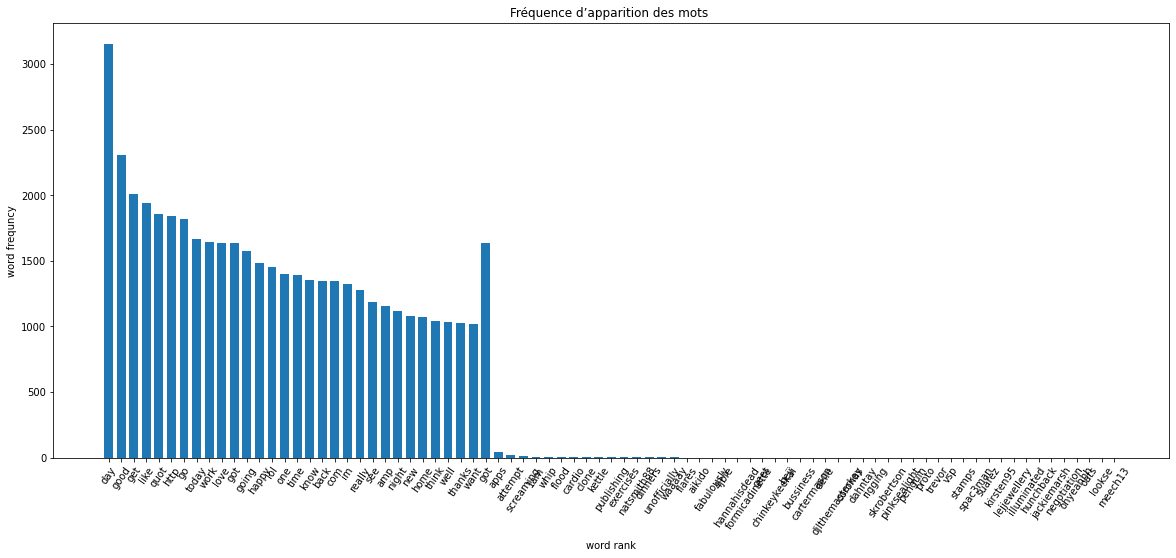

In [43]:
wsum = np.array(XX.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

def subsample(x, step=950):
    return np.hstack((x[:30], x[10::step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Fréquence d’apparition des mots ");

On remarque les 5 mots les plus frequent sont :
- day
- good
- get
- like
- quot

In [44]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py

freq = subsample(wrank)
r = np.arange(len(freq))

trace = go.Bar(
                x = r,
                y = freq,
                name = "La fréquence d'apprition des mots",
                marker = dict(color = 'rgba(255, 87, 51, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =2.5)),
                text = subsample(labels))

layout = go.Layout(barmode = "group",
                  title = 'Fréquence d’apparition des mots ',
                  yaxis = dict(title = 'word frequncy'),
                  xaxis = dict(title = 'word rank'))
fig = go.Figure(data = trace, layout = layout)
fig.update_xaxes(
        tickmode='array',
        tickvals = r,
        ticktext = labels
)
iplot(fig)

# TfidVectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer



vc = TfidfVectorizer(stop_words=stopword)
XX2 = vc.fit_transform(xx)
#print(vectorizer.get_feature_names())
print(XX2.shape)

(40000, 48070)


In [46]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py


wsum = np.array(XX2.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

def subsample(x, step=150):
    return np.hstack((x[:30], x[10::step]))

trace = go.Bar(
                x = r,
                y = freq,
                name = "Le score universitaire pour le transfert de connaissances par pays",
                marker = dict(color = 'rgba(255, 87, 51, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =2.5)),
                text = subsample(labels))

layout = go.Layout(barmode = "group",
                  title = 'Fréquence d’apparition des mots ',
                  yaxis = dict(title = 'word frequncy'),
                  xaxis = dict(title = 'word rank'))
fig = go.Figure(data = trace, layout = layout)
fig.update_xaxes(
        tickmode='array',
        tickvals = r,
        ticktext = labels
)
iplot(fig)

On remaque que lorsqu'on utilise TfidVectorizer au lieu de CountVectorizer, on obtient pas les même grapfique (la frequence d'apparition des mots)
ici on obtient pour les 5 mot les plus frequent : 
- day
- good
- work
- happy
- go

In [ ]:
#df.sentiment.astype('int')
df.info()
df.sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  int64 
 1   content    40000 non-null  object
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


13    8638
4     8459
1     5209
2     5165
5     3842
6     2187
7     1776
8     1526
12    1323
9      827
10     759
11     179
3      110
Name: sentiment, dtype: int64

In [ ]:
# function Tokenize + punctuation + stopwords + lemmatisation + stemming
import nltk
nltk.download('wordnet')
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer,LancasterStemmer
import string

mm = "The girls wanted to played with their < parents ...."
#m = 'Sample message! Notice: it has punctuation.'

def clean_text(mm):
    punct=[]
    clean=[]
    lem = []
    stemming = []
    # tokenisation + punctuation
    for item in mm :
        if item not in string.punctuation:
            punct.append(item)#.WordNetLemmatizer())
            #print(punct1)
            p=''.join(punct)
    # Stopwords
    for item in p.split():#punctuation(m).split():
        if item.lower() not in stopwords.words('english'):
            clean.append(item)#.WordNetLemmatizer())
    # Lemmatization
    for each in clean :
        lemma = WordNetLemmatizer()
        lem=[lemma.lemmatize(word)for word in clean]
    # Stemming
    for item in lem:
        b = PorterStemmer().stem(item)
        # = LancasterStemmer().stem(b)
        stemming.append(b) 
    return ",".join(stemming)
print(clean_text(mm))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
girl,want,play,parent


In [ ]:
df['clean'] = df['content'].apply(clean_text)
df.clean

0        tiffanylu,know,listenin,bad,habit,earlier,star...
1                    layin,n,bed,headach,ughhhhwaitin,call
2                              funer,ceremonygloomi,friday
3                                    want,hang,friend,soon
4        dannycastillo,want,trade,someon,houston,ticket...
                               ...                        
39995                                      johnlloydtaylor
39996                                happi,mother,day,love
39997    happi,mother,day,mommi,woman,man,long,your,mom...
39998    niariley,wassup,beauti,follow,peep,new,hit,sin...
39999    mopedronin,bullet,train,tokyo,gf,visit,japan,s...
Name: clean, Length: 40000, dtype: object

In [ ]:
# function lemmatization + stemming
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer,LancasterStemmer

z = "The girls wanted to played"


def lem_stem(z):
    lem =[]
    stemming = []
    for each in z.split() :
        lemma = WordNetLemmatizer()
        lem=[lemma.lemmatize(word)for word in z.split()]
    # Stemming
    for item in lem:
        b = PorterStemmer().stem(item)
        # = LancasterStemmer().stem(b)
        stemming.append(b)
    return stemming
print(lem_stem(z))

['the', 'girl', 'want', 'to', 'play']


# Pipeline avec lemmatisation, stemming et stopwords

In [ ]:
from time import time
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score


corpus = df.clean
targets = df.sentiment

pipe0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logit', LogisticRegression()),
])
pipe1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', svm.SVC(kernel='poly')),
])
pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier()),
])
pipe3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svml', LinearSVC()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopword)),
    ('decision_tree', tree.DecisionTreeClassifier()),
])
parameters = {
    'analyzer':lem_stem,
    'stop_words': stopword
    }

def run_pipes(pipes, splits=5, test_size=0.2):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=0)
    for idx_train, idx_test in spliter.split(corpus):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                precision_score(y_test, y, average='macro'),
                pipe.score(X_test, y_test),
                recall_score(y_test, y, average='macro'),
                f1_score(y_test, y, average='macro')
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean(),
            "precision": arr[:, 1].round(3),
            "score": arr[:, 2].round(3),
            "recall": arr[:, 3].round(3),
            "f1_score": arr[:,4].round(3)
          
        }

    D = pd.DataFrame.from_dict(final, orient="index").round(3)
    print(D)
    return D
    
res = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4], splits=1)
print_table(res)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packa

                       time precision    score   recall f1_score
tfidf-logit          16.108   [0.229]  [0.355]  [0.177]  [0.177]
tfidf-svm           437.085     [0.2]  [0.282]  [0.114]  [0.099]
tfidf-KNN             0.398    [0.14]  [0.219]  [0.093]  [0.085]
tfidf-svml            1.957   [0.182]  [0.311]  [0.171]  [0.171]
vect-decision_tree   25.490   [0.161]  [0.278]  [0.156]  [0.156]


,time,precision,score,recall,f1_score
tfidf-logit,16.108,[0.229],[0.355],[0.177],[0.177]
tfidf-svm,437.085,[0.2],[0.282],[0.114],[0.099]
tfidf-KNN,0.398,[0.14],[0.219],[0.093],[0.085]
tfidf-svml,1.957,[0.182],[0.311],[0.171],[0.171]
vect-decision_tree,25.490,[0.161],[0.278],[0.156],[0.156]


# Pipeline sans lemmatisation, stemming mais avec stopwords

In [ ]:
from time import time
from collections import defaultdict


#corpus = df.clean
corpus = df.content
targets = df.sentiment

pipe0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logit', LogisticRegression()),
])
pipe1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', svm.SVC(kernel='poly')),
])
pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier()),
])
pipe3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svml', LinearSVC()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopword)),
    ('decision_tree', tree.DecisionTreeClassifier()),
])
parameters = {
    'stop_words': stopword
    }

def run_pipes(pipes, splits=5, test_size=0.2):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=0)
    for idx_train, idx_test in spliter.split(corpus):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                precision_score(y_test, y, average='macro'),
                pipe.score(X_test, y_test),
                recall_score(y_test, y, average='macro'),
                f1_score(y_test, y, average='macro')
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean(),
            "precision": arr[:, 1].round(3),
            "score": arr[:, 2].round(3),
            "recall": arr[:, 3].round(3),
            "f1_score": arr[:,4].mean().round(3)
        }

    D1 = pd.DataFrame.from_dict(final, orient="index").round(3)
    return D1
    
res1 = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4], splits=1)
print_table(res1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,time,precision,score,recall,f1_score
tfidf-logit,19.751,[0.222],[0.354],[0.175],0.173
tfidf-svm,683.706,[0.213],[0.291],[0.116],0.096
tfidf-KNN,0.551,[0.135],[0.241],[0.113],0.109
tfidf-svml,2.527,[0.18],[0.32],[0.171],0.171
vect-decision_tree,26.867,[0.17],[0.28],[0.158],0.161


# Pipelines avec stopwords et ngram_range = (1,2)

In [ ]:
from time import time
from collections import defaultdict


#corpus = df.clean
corpus = df.content
targets = df.sentiment

pipe0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logit', LogisticRegression()),
])
pipe1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', svm.SVC(kernel='poly')),
])
pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier()),
])
pipe3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svml', LinearSVC()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopword)),
    ('decision_tree', tree.DecisionTreeClassifier()),
])
parameters = {
    'stop_words': stopword,
    'ngram_range': (1,2)    
    }

def run_pipes(pipes, splits=5, test_size=0.2):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=0)
    for idx_train, idx_test in spliter.split(corpus):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                precision_score(y_test, y, average='macro'),
                pipe.score(X_test, y_test),
                recall_score(y_test, y, average='macro'),
                f1_score(y_test, y, average='macro')
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean(),
            "precision": arr[:, 1].round(3),
            "score": arr[:, 2].round(3),
            "recall": arr[:, 3].round(3),
            "f1_score": arr[:,4].mean().round(3)
            #"f1_sadness": [arr[:,1].mean().round(3), arr[:,2].std().round(3)]
            #"f1_anger": [arr[:,3].mean().round(3), arr[:,3].std().round(3)],
            #"f1_fear": [arr[:,4].mean().round(3), arr[:,4].std().round(3)],
            #"f1_love": [arr[:,5].mean().round(3), arr[:,5].std().round(3)],
            #"f1_surprise": [arr[:,6].mean().round(3), arr[:,6].std().round(3)],
            #"f1_fun": [arr[:,7].mean().round(3), arr[:,7].std().round(3)],
            #"f1_relief": [arr[:,8].mean().round(3), arr[:,8].std().round(3)],
            #"f1_empty": [arr[:,9].mean().round(3), arr[:,9].std().round(3)],
            #"f1_enthusiasm": [arr[:,10].mean().round(3), arr[:,10].std().round(3)],
            #"f1_boredom": [arr[:,11].mean().round(3), arr[:,11].std().round(3)],
            #"f1_hate": [arr[:,12].mean().round(3), arr[:,12].std().round(3)],
            #"f1_neutral": [arr[:,13].mean().round(3), arr[:,13].std().round(3)]
        }

    D2 = pd.DataFrame.from_dict(final, orient="index").round(3)
    return D2
    

res2 = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4], splits=1)
print_table(res2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,time,precision,score,recall,f1_score
tfidf-logit,23.958,[0.222],[0.354],[0.175],0.173
tfidf-svm,674.944,[0.213],[0.291],[0.116],0.096
tfidf-KNN,0.526,[0.135],[0.241],[0.113],0.109
tfidf-svml,2.535,[0.18],[0.32],[0.171],0.171
vect-decision_tree,26.786,[0.164],[0.279],[0.155],0.157


On remarque que les resultats de f1_score sont faibles, donc on aurait des prédictions par très bonnes
Alors je vais tester les données sur les 2 models les plus performant SVM(kernel=poly) et Decision tree  c'est à dire sans la lemmatisation, le stemming et le nggram_range=(1,2) en utilisant TfidfVectorizer

# TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

xx_1 = df.content
print(xx_1.shape)

yy_1 = df.sentiment
print(yy_1.shape)

vc_1 = TfidfVectorizer(stop_words=stopword, ngram_range=(1,2))
XX_1 = vc_1.fit_transform(xx_1)
print(XX_1.shape)

(40000,)
(40000,)
(40000, 253407)


# SVM(kernel=poly)

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

xx1_train, xx1_test, yy1_train, yy1_test = train_test_split(XX_1, yy_1, test_size = 0.2, random_state=0)

model_ngram_SVM_poly_2 = svm.SVC(kernel='poly')
model_ngram_SVM_poly_2.fit(XX_1, yy_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yy1_pred=model_ngram_SVM_poly_2.predict(xx1_test)
print(model_ngram_SVM_poly_2.predict(XX_1[0]))
print(model_ngram_SVM_poly_2.predict(XX_1[3]))
print(model_ngram_SVM_poly_2.predict(XX_1[4]))
print(model_ngram_SVM_poly_2.predict(XX_1[1]))
print(model_ngram_SVM_poly_2.predict(XX_1[2]))


[9]
[10]
[13]
[2]
[2]


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score

score_ngram_SVM_poly_2 = model_ngram_SVM_poly_2.score(xx1_test, yy1_test)                              
print("Score = ",score_ngram_SVM_poly_2.round(3))

recall_ngram_SVM_poly_2 = recall_score(yy1_test, yy1_pred, average='macro')                             
print("Recall = ", recall_ngram_SVM_poly_2.round(3))

precision_ngram_SVM_poly_2 = precision_score(yy1_test, yy1_pred, average='macro')
print("Precision = ",precision_ngram_SVM_poly_2.round(3))

f1_score_ngram_SVM_poly_2_none = f1_score(yy1_test, yy1_pred, average=None)#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_ngram_SVM_poly_2_none.round(3))

f1_score_ngram_SVM_poly_2_mean = f1_score(yy1_test, yy1_pred, average='macro')#, pos_label='1')#le pos_label ici est ignoré car multiclasse
#f1_score_LR = f1_score(y_test, y_pred, average=None, pos_label='2') 
print("f1_score = ",f1_score_ngram_SVM_poly_2_mean.round(3))

Score =  0.991
Recall =  0.988
Precision =  0.995
f1_score =  [0.992 0.992 1.    0.99  0.984 0.99  0.996 0.988 0.979 0.99  1.    0.994
 0.992]
f1_score =  0.991
